## Introducing Numpy

### numpy 배열

- numpy는 과학계산을 수행하는 파이썬 핵심 패키지
- 주요 제공 기능
    - N 차원 배열
    - 원소별 연산(브로드캐스팅)
    - 브로드캐스팅 그림 참조 : https://taewanmerepo.github.io/2018/01/numpy/broadcast.png
    - 선형대수학 등 핵심 수학 연산
    - C/C++, 포트란 코드 인터페이스 제공
    
- numpy 공식 레퍼런스
    - https://docs.scipy.org/doc/numpy/reference/
    
### Python list vs numpy 배열

- Python의 리스트는 거의 모든 종류의 객체를 담을 수 있어 유연하지만, 속도와 메모리 효율이 좋지 않다는 것이 단점
- numpy의 배열은 한 행에 동일 형식의 원소를 저장
    - Python의 리스트에 비해 유연성은 떨어지지만
    - 빠른 연산과 메모리 효율에서 강점을 보인다
    
### numpy의 사용

- 일반적으로 numpy는 np라는 별칭으로 줄여 임포트한다

In [1]:
# numpy를 np 별칭으로 임포트 해 봅시다
import numpy as np

### numpy 배열 만들기

- Python의 리스트를 이용한 생성
    - 각 값들은 (양의 정수)튜플 형태로 인덱싱됨
    - shape는 각 차원의 크기를 튜플로 반환
    - (rank는 배열이 몇 차원인지 의미) -> 이젠 사용X
    - 다차원 배열을 만들기 위해서는 리스트를 중첩하여 생성
        - 차원은 대괄호의 갯수로도 알 수 있음    
    - ex) 리스트 -> numpy 배열 : np.array(리스트)
    - numpy 배열 -> 리스트 : 배열.tolist()

### 배열 상태 확인
    - shape 확인 : 배열.shape
    - 차원 확인 : 배열.ndim
    - 원소 갯수 확인 : 배열.size
    - (1차원 배열만) 길이 확인 : len(배열)
    - 배열 타입 확인 : 배열.dtype
    - 겹치지 않는 유일한 값 확인 : 배열[feature이름].unique()
    - 원소별 갯수 세기 : 배열[feature이름].value_counts()
        - () 안의 파라미터 : 
        - normalize=False(갯수 세기) / True(비율 구하기)
        - sort=True(갯수 기준 정렬) / False(값 기준 정렬)
        - ascending=False(내림차순 정렬) / True(오름차순 정렬)
        - dropna=True(NaN 값 무시) / False(NaN 값 포함)

In [3]:
# Python의 리스트를 이용한 생성 방법 연습
arr = np.array([1,2,3])
print("arr의 type:", type(arr))

shape = arr.shape
print("arr의 shape:", shape)  # rank가 1인 배열

# 2차원 배열
arr2d = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
print(arr2d)
print("arr2d의 shape:", arr2d.shape)  # rank가 2인 배열

# 3차원 배열
arr3d = np.array([
    [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ],
    [
        [10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]
    ]
])
print(arr3d)
print("arr3d의 shape:", arr3d.shape)  # 출력값 : (2, 3, 4) # 2열 3행 3matrix

In [4]:
# 리스트 객체 -> numpy 배열 객체 변환 : np.array(리스트객체)
list1 = [[1, 2, 3], [4, 5, 6]]
print(list1)
print(type(list1))

arr12 = np.array(list1)
print(arr12)
print(type(arr12))

# numpy 배열 객체 -> 리스트 객체 변환 : numpy배열객체.tolist()
list2 = arr12.tolist()
print(list2)
print(type(list2))

# 튜플 객체 -> numpy 배열 객체 변환 : np.array(튜플객체)
tuple1 = (0, 1, 2, 3, 4, 5)
tupTOarr = np.array(tuple1).reshape(2, 3)
print(tupTOarr, type(tupTOarr), tupTOarr.shape)

- List 없이 array 만들기
    - () 안에 튜플로 된 shape 지정
    
    - np.zeros() : 0으로 채워진 배열
    - np.ones() : 1로 채워진 배열
    - np.full(shape, '지정한 상수') : 지정한 상수로 채워진 배열
    - np.eye() : 단위 행렬(항등 행렬) 생성 // 주대각선성분 : 1, 나머지성분 : 0
    - np.identity() : 단위 행렬(항등 행렬) 생성
    - np.empty() : 초기화하지 않은 행렬 생성(메모리 초기화 안 된 상태라 예상치 못한 쓰레기값이 들어가있을 수 있음)

- 이미 있는 배열과 똑같은 shape의 array 만들기
    - () 안에 배열 객체 입력
    - np.zeros_like()
    - np.ones_like()
    - np.full_like(배열, '지정한 상수')
    - np.empty_like() : 주어진 배열과 동일한 shape를 가지며 초기화되지 않은 행렬 생성

- 배열 2개를 붙여서 배열 만들기
    - 배열 + 배열 열 방향으로(왼쪽>오른쪽) 붙이기
        - np.r_[arr1, arr2]
        - np.hstack([arr1, arr2])
        - np.concatenate((arr1, arr2))  # 기본값 : axis=0
        - np.concatenate((arr1, arr2), axis=0)
    - 배열
       +
      배열   행 방향으로(위쪽>아래쪽) 붙이기
        - np.r_[[arr1, arr2]]
        - np.vstack([arr1, arr2])
        - np.concatenate((arr1, arr2), axis=1)   # 1차원 배열은 불가능
    - 1차원 배열 + 1차원 배열 열 방향으로(세로로) 붙여서 2차원 배열 만들기
        - np.c_[arr1, arr2]
        - np.column_stack([arr1, arr2])
        - np.concatenate((arr1.T, arr2.T), axis=1)  # 1차원 배열은 불가능

In [5]:
# array를 만드는 다양한 방법을 알아봅시다
arr = np.zeros((2, 2))  # 2 * 2의 0으로 채워진 rank 2의 배열
print("zeros:", arr)

arr = np.ones((2, 2))  # 2 * 2의 1로 채워진 rank 2의 배열
print("ones:", arr)

arr = np.full((2, 2), 7)  # 2 * 2의 상수 7로 채워진 rank 2의 배열
print("full:", arr)

arr = np.eye(2)  # 2 * 2의 단위행렬(주대각성분 : 1, 나머지 성분 : 0 으로 채워진 행렬)
print("eye:", arr)

arr = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
el = np.empty_like(arr)  # arr과 shape가 동일한 초기화 되지 않은 배열 생성
print(el)
print(arr.shape == el.shape)  # shape는 동일한가?

- 범위 벡터의 생성
    - arange() : 범위 값으로 배열 만들기
    - linspace() : 선형 간격의 벡터 만들기
    - logspace() : 로그 간격의 벡터 만들기

In [6]:
# 범위 벡터를 만들기 연습
arr = np.arange(100)  # 0부터 99까지의 범위 벡터
print(arr)

arr = np.linspace(0, 1, 100)  # 0부터 1까지의 범위를 100개로 선형 분할
print(arr)

arr = np.logspace(0, 1, 100)  # 0부터 1까지의 범위를 100개로 로그 분할
print(arr)  # log(1) = 0, log(10) = 1 // 밑이 10인 상용로그

### array의 타입

- numpy의 array는 한 가지 타입만 담을 수 있다
    - 데이터 타입 지정X -> 임의로 적절한 데이터 타입을 선택
    - 데이터 타입 지정 : dtype 파라미터 이용
    - 데이터 형태 확인 : 배열.dtype
    - 데이터 형태 변환 : 배열.astype()
    
- numpy 자료형 참조 페이지 : https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html

In [7]:
# array의 타입 체크, 변경을 연습해 봅니다.
arr = np.ones(2)  # 데이터 타입을 지정하지 않으면 임의로 설정
print(arr)
print("dtype of arr:", arr.dtype)

# array 생성시 dtype으로 내부 데이터 타입을 지정
arr = np.ones(2, dtype=int)
print(arr)
print("dtype of arr:", arr.dtype)

# astype() 메서드를 이용, 다른 데이터 타입으로 변경 가능
arr2 = arr.astype(np.float32)
print(arr2)
print("dtype of arr2:", arr2.dtype)

### array의 재구성

- 생성된 array는 다양한 형태로 변경될 수 있다
    - ravel() : 1차원 배열로 변경
    - reshape() : 원하는 shape로 변경
        - 방법 1 : np.reshape(배열, shape)
        - 방법 2 : 배열.reshape(shape)
        - -1을 쓰는 경우 : 자동으로 지정
        - 배열.reshape(-1) == 배열.reshape(1, -1) # 1행의 벡터

        - ex) 2차원 배열로 변경
        - 배열.reshape(row. column)
        - ex) 3차원 배열로 변경
        - 배열.reshape(row. column, depth)
    - transpose() : 행렬의 전치. 열 <-> 행
        - 간단히 T 속성을 사용해도 무방

- 재구성한 배열의 요소 변경 
- -> 원본 배열, 원본 배열로부터 파생된 모든 재구성된 배열 요소 같이 변경

- 배열 size 변경 : 배열.resize(shape)
- 배열.reshape()와의 차이점?
    - 배열.reshape(shape) : 변경 shape가 원본과 맞지 않으면 오류
    - 배열.resize(shape) : 변경 size가 원본과 맞지 않더라도 오류 X
        - 요소가 모자라면 '0'으로 채움
        - 요소가 남으면 앞에 요소만 남고 뒤에 남는 요소들은 삭제

- 배열 끝에 값 추가 : np.append(배열, 값), np.append(배열, 배열)
    1. axis 지정 안 했을 경우 : 1차원 배열로 변환됨
    2. axis 지정했을 경우
        - np.append(배열, 값, axis=0)
        - np.append(배열, 값, axis=1)

- 원하는 인덱스에 값 추가 : np.insert(배열, index, 값)
    - 원본 배열 영향 X
    1. axis 지정 안 했을 경우 : 1차원 배열로 변환됨
        - np.insert(배열, index, 값)
    2. axis 지정했을 경우
        - np.insert(배열, index, 값, axis=0)
        - np.insert(배열, index, 값, axis=1) 

- 원하는 인덱스의 값 삭제 : np.delete(배열, index)
    - 원본 배열 영향 X
    1. axis 지정 안 했을 경우 : 1차원 배열로 변환됨
        - np.delete(배열, index)
    2. axis 지정했을 경우
        - np.delete(배열, index, axis=0)
        - np.delete(배열, index, axis=1)

- 배열 쪼개기
    - 세로로 분할 : np.hsplit(배열, 갯수), np.hsplit(배열, 기준index)
        - b = np.hsplit(a, 2)
        - d = np.hsplit(a, [1, 3, 5])  # [:, :1], [:, 1:3], [:, 3:5], [:, 5:]로 분할
    - 가로로 분할 : np.vsplit(배열, 갯수), np.vsplit(배열, 기준index)
        - f = np.vsplit(a, 4)
        - g = np.vsplit(a,[1, 3])  # [:1, :], [1:3, :], [3:, :]로 분할

In [8]:
# array 재구성 연습
arr1d = np.arange(25)
print("arr1d:", arr1d)  # 1차원 배열
arr2d = arr1d.reshape(5, 5)  # arr1d -> 5 * 5의 2차원 배열로 형태 변환
print("arr2d:", arr2d)
# 형태 변환시 요소의 갯수가 모자라면 에러
# arr3d = arr2d.reshape(4, 4, 4)

# 다차원 배열의 요소를 1차원 형태로 변환(flatten : 평탄화 작업)
flatten = arr2d.ravel()
print("flatten:", flatten)

# 행렬의 전치 : 행 <-> 열
print(arr2d.transpose())
print(arr2d.T)
print(arr2d)  # 원래 행렬이 변하진 않음

In [9]:
import numpy as np
arr = np.arange(24).reshape(2, 3, 4)
print(arr)

# row : 2
# [[ 0  1  2  3]       # 1개
#   [ 4  5  6  7]
#   [ 8  9 10 11]]

# [[12 13 14 15]       # 2개
#   [16 17 18 19]
#   [20 21 22 23]]

# column : 3
# [[ 0  1  2  3]       # 1개
#   [ 4  5  6  7]      # 2개
#   [ 8  9 10 11]]     # 3개

# depth : 4
# 0                    # 1개
# 1                    # 2개
# 2                    # 3개
# 3                    # 4개

### array의 인덱싱과 슬라이싱

- numpy의 array 인덱싱과 슬라이싱은 기본적으로는 파이썬의 인덱싱/슬라이싱 방식과 거의 동일하다
- numpy의 array는 다차원인 경우가 많기 때문에 각 차원별 인덱스/슬라이스 범위를 잘 정해주어야 한다

In [10]:
# array의 인덱싱을 연습해보자.
arr = np.arange(1, 13).reshape(4, 3)  # 1 ~ 12까지의 1차원 배열을 4행 3열의 2차원 배열로 reshape
print(arr)

# 2차원 배열이므로 행, 열의 순서로 인덱스 지정
print(arr[0, 1])                  # 0행 1열의 요소
# 가장 첫 번째 행을 반환
print(arr[0, :])                  # 0행의 처음부터 끝까지
# 가장 마지막 행을 반환
print(arr[arr.shape[0] -1, :])
# 역인덱스(음수) 사용 가능
print(arr[-1, :])                 # 가장 마지막 행의 전체 열
# 첫번째 열의 모든 요소들
print(arr[:, 0])                  # 전체 행의 0번 열
# 가장 마지막 열의 모든 요소들
print(arr[:, -1])                 # 전체 행의 가장 마지막 행

### numpy 배열 원소 대체

In [24]:
arr1 = np.zeros((2,3))
print(arr1)

# 다 같은 원소로 대체
arr1[:] = [1]
print(arr1)

# 같은 행으로 대체
arr1[:] = [1, 2, 3]
print(arr1)

# 내가 원하는 값으로 대체
arr1[:] = [(1, 2, 3),
          (4, 5, 6)]
print(arr1)

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]
[[1. 2. 3.]
 [1. 2. 3.]]
[[1. 2. 3.]
 [4. 5. 6.]]


### 조건적 인덱싱

- where() : 조건에 해당하는 인덱스를 추출
- delete() : 특정 인덱스 삭제

In [11]:
# 조건적 인덱싱 연습
arr = np.arange(1, 17).reshape(4, 4)
print(arr)

# 요소 값이 10 초과인 요소들 확인
print("condition:", arr>10)       # 브로드캐스팅 연산
# boolean 값을 확인
# boolean 값을 인덱스로 부여하면 True 셀만 출력
indexes = np.where(arr>10)
print("요소값이 10초과한 인덱스:", indexes)

newArr = arr[indexes]
print("newArr:", newArr)

# delete : 특정 인덱스의 요소를 삭제
# 축의 정보가 중요
newArr2 = np.delete(arr, [0], axis=0)     # 0번 행 삭제
print("newArr2:", newArr2)
# 1번 2번 열 삭제
newArr3 = np.delete(arr, [1, 2], axis=1)  # 1, 2번 열 삭제
print("newArr3:", newArr3)

### Boolean 배열 인덱싱

- 논리 연산을 수행하여 복수의 조건을 만족하는 인덱스를 추출해내는 방법
- numpy 배열 불린 연산에서는 &(and), |(or), ~(not) 연산자를 사용할 수 있다

- Boolean 배열 인덱싱 참조 : https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

In [12]:
# Boolean 배열 인덱싱을 연습해 봅시다.
source = np.arange(1, 17).reshape(4, 4)   # 1 ~ 16까지 4 * 4 배열
print(source)

# 요소 값이 3보다 큰 값
cp = source.copy()      # 배열 복사 : 깊은 복사 # 복사된 배열 변경 -> 원본 배열에 영향 X
index_gt_3 = cp > 3    # 3보다 큰 요소의 boolean 연산
print(cp[index_gt_3])                     # 1행의 벡터로 출력

# 요소 값이 7보다 작은 값
index_lt_7 = cp < 7      # 7보다 작은 요소의 boolean 연산
print(cp[index_lt_7])

# 두 논리의 합성
# 연산자 주의 : &(and), |(or), ~(not)
index_comp = (cp > 3) & (cp < 7)
print(index_comp)
print(cp[index_comp])

# 요소들 중에서 3의 배수인 요소들만 추출
index_mod = cp % 3 == 0
print(index_mod)
print(cp[index_mod])

# 요소들 중에서 3의 배수가 아닌 요소들 추출
print(~index_mod)       # not index_mod
print(cp[~index_mod])

### fancy indexing
- 배열에 인덱스 배열 전달
    - arr[[0,1,2,3], [0,1,2,3]]
    - [arr[0,0], arr[1,1], arr[2,2], arr[3,3]]
    - 위의 두 식은 동일한 결과
- 전체 행에 대해 1,2번 컬럼 참조
    - arr[:, [1,2]]

### 배열 연산

- 기본적 수학 함수는 배열의 각 요소별로 동작
- 연산자를 이용 동작하거나 numpy 함수 모듈을 이용하여 동작함

In [13]:
# 배열 연산을 연습해 봅니다.
x = np.arange(1, 5).reshape(2, 2)
y = np.arange(5, 9).reshape(2, 2)

print(x)
print(y)

# 배열과 배열의 합
print(x + y)
print(np.add(x, y))

# 배열과 배열의 차
print(x - y)
print(np.subtract(x, y))

# 배열과 배열의 곱
print(x * y)
print(np.multiply(x, y))

# 배열과 배열의 나눗셈
print(x / y)
print(np.divide(x, y))

### numpy 행렬 곱

- *, multiply는 기본적으로 요소의 곱
- 벡터의 내적, 벡터와 행렬의 곱, 행렬곱을 위해서는 dot 함수 사용
- dot 메서드는 모듈 함수, 배열 객체의 인스턴스 양쪽 모두 사용 가능

In [14]:
# numpy 행렬 곱 연습

# 벡터의 내적
v1 = np.array([9, 10])
v2 = np.array([11, 12])
# 9 * 11 + 10 * 12
print(v1.dot(v2))  # 객체 인스턴스
print(np.dot(v1, v2))

# 행렬과 벡터의 곱
x = np.arange(1, 5).reshape(2, 2)
print(x)
print(v1)

print("행렬 * 벡터:", x.dot(v1))
print("행렬 * 벡터:", np.dot(x, v1))

# 행렬과 행렬의 내적(중요!)
y = np.arange(5, 9).reshape(2, 2)
print(x)
print(y)

print(x.dot(y))  # 내적
print(np.dot(x, y))

### array 연산 함수

- numpy는 배열 연산에 유용하게 사용되는 많은 함수를 제공
- 배열 연산 함수 참조 : https://docs.scipy.org/doc/numpy/reference/routines.math.html

- 합 : 배열.sum(), np.sum(배열)
- axis=None : 행렬 전체
- axis=0 : row 기준
- axis=1 : column 기준
- axis=2 : depth 기준
- 배열.sum(axis=0) 참조 : http://taewan.kim/post/numpy_sum_axis/, http://taewan.kim/post/numpy_cheat_sheet/


In [15]:
# array 연산 함수 중, sum 함수를 활용해 봅니다
x = np.arange(1, 13).reshape(4, 3)
print(x)
print("sum:", x.sum())  # 기본적으로는 모든 요소의 합

# axis로 연산 함수를 적용할 축을 지정
print(np.sum(x, axis=0))  # 각 열의 합산값(행의 방향)
print(np.sum(x, axis=1))  # 각 행의 합산값(열의 방향)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
sum: 78
[22 26 30]
[ 6 15 24 33]


### 브로드캐스팅

- numpy에서 shape가 다른 배열 혹은 배열과 스칼라 사이의 산술 연산이 가능하도록 하는 매커니즘
- Universal Function이라고도 함

In [16]:
# 브로드캐스팅을 연습해 봅니다
# 배열과 스칼라의 연산
x = np.arange(12).reshape(3, 4)
print(x)

# 각 요소에 동일한 값을 더해보자.
print(x + 2)

# 배열과 배열의 브로드캐스팅
y = np.array([1, 2, 3, 4])
print(y)
print(x + y)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 2  3  4  5]
 [ 6  7  8  9]
 [10 11 12 13]]
[1 2 3 4]
[[ 1  3  5  7]
 [ 5  7  9 11]
 [ 9 11 13 15]]


### numpy 난수 발생

- 임의의 수가 필요할 때, 혹은 전체 데이터를 기반으로 샘플링을 하고자 할 때는 난수가 필요
- numpy의 난수 발생은 단순히 임의의 난수를 넘어 다양한 통계(분포:distribution) 기반의 샘플링을 위한 난수 기능을 다양하게 제공
- random 패키지 내에 위치

- 다양한 난수 메서드들

    - randint() : 정수 난수 발생
    - randn() : n차원 난수 발생
    - binomial() : 이항분포
    - hypergeometric() : 초기하분포
    - poisson() : 포아송 분포
    - normal() : 정규 분포
    - standart_t() : t-분포
    - uniform() : 균등분포
    - f() : f-분포
    
    - seed() : 재현 가능성(Reproductibility)을 위한 난수 초기값 설정

6
[52 93 15 72 61 21 83 87 75 75]
[[ 0.27904129  1.01051528 -0.58087813]
 [-0.52516981 -0.57138017 -0.92408284]
 [-2.61254901  0.95036968  0.81644508]]
-1.523875997615861
[[-0.42804606 -0.74240684]
 [-0.7033438  -2.13962066]]
[-1.88842488  1.7931614   7.67846409  1.18269907  0.3666575  -1.54630699
 -1.80076155  2.84231946  0.873102   -1.90667922 -3.06465658 -0.48526616
 -1.60094641 -0.01658359 -0.68835136  1.16804674 -3.79535734  3.27597679
  8.33493912  3.58091917  0.65591495  2.64528312 -3.02725603 -4.74988264
  2.32110125 -1.61442498 -4.04003429 -2.6417738  -3.39165691  0.40328665
  1.74636838  2.66324538  2.68299699  2.26499339 -0.62149767 -1.87043218
 -4.52445987  3.29894093 -0.53319636 -1.23114993  3.53914903 -2.69462382
  2.50438626  0.88968415 -3.11348963 -0.22741124  2.9188906   2.38678639
  4.48630276  1.01454376 10.11688876 -2.76117242 -1.19591517 -0.18259226
 -4.25625138  3.12747485  2.71059747  0.05700099 -1.60324936 -4.48516161
 -2.36777499  2.23113385 -0.63648427 -1.2806

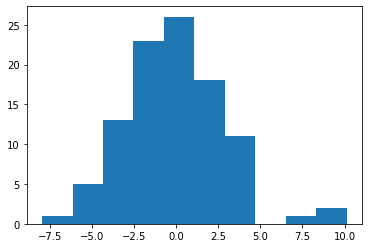

In [17]:
# 기본적인 난수 발생과 분포 기반 난수를 연습합니다.
np.random.seed(seed=42)  # 재현 가능성을 위한 난수 초깃값
# 동일한 난수 초깃값에서 난수 발생하면 동일한 난수가 발생됨
# 단, 난수 초깃값이 초기화되지 않으면 반복할 때마다 새로운 난수 발생

# 정수 난수
print(np.random.randint(10))  # 10 이하의 정수 난수
print(np.random.randint(1, 101, 10))  # 1 ~ 100 사이의 정수 난수 10개 생성

# n차원 난수 발생
print(np.random.randn(3, 3))  # 3 * 3의 난수 행렬 생성

# 정규 분포 기반 난수 발생
print(np.random.normal())

# size 옵션 파라미터로 난수의 행렬 크기 지정할 수 있다.
print(np.random.normal(size=(2, 2)))  # 2 * 2의 정규분포 기반 난수 행렬

# 평균이 0이고 표준편차가 3인 정규분포로부터 난수 100개 생성
rand_norm = np.random.normal(0.0,      # 평균
                            3.0,       # 표준편차
                            size=100   # 표본의 갯수
                            )
print(rand_norm)

# 히스토그램을 그려보자 : 정규분포 기반 -> 종형그래프가 나올 것
import matplotlib.pyplot as plt
plt.hist(rand_norm)
plt.show()

### numpy 파일 저장/불러오기

- numpy는 바이너리 형태로 저장 가능하며 저장된 데이터는 나중에 불러와 다시 사용할 수 있다

- 저장 메서드
    - save() : npy(비압축) 형태로 저장
    - savez() : npz(압축) 형태로 저장. 압축 과정을 거치므로 save 메서드에 비해 속도는 느리지만, 대용량의 데이터 저장엔 용량의 측면에서 유리
    
- 불러오기 메서드
    - load()

In [18]:
# numpy 파일 저장 불러오기 연습
original = np.random.randn(1000, 1000)

# 확장자를 지정하지 않아도 적절한 확장자가 지정된다.
np.save("npydata", original)  # original 객체를 npydata.npy로 저장

# 불러오기(복원)
recover = np.load("npydata.npy")
print(recover.shape)

(1000, 1000)
